
# Project: Analysis of patients appointment



### Introduction


This dataset is about analysing the patients with different ailments who will turn up to appointment or not. in particular, this is to analyse the trends of patients who turn up to appointment vs who do not turn up.

It consists for 14 columns with 100K observations collected in Brazil. The following are the characterstics of patients included in each row.

1. 'Scheduled Day' tells about when the appointment was scheduled
2. 'Neighborhood’ indicates the location of the hospital.
3. ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions to explore:

1. The relationship between age and the show rate?
2. Relationship between Hipertension patients and show rate?
3. Relationship between Alcoholism patients and show rate?
4. How is behavior of Diabetic patients towards appointments?
5. How is behavior of Hipertension patients towards appointments?
6. What is the mean age of patients who turning up to appointments and who don't? 


In [179]:
# importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## Data Wrangling

In [180]:
# Reading the file and viewing the first 5 rows
df = pd.read_csv('D:/Data Analyst - Udacity/Datasets/project02-investigate a dataset/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [181]:
df.shape #To know the dimenstions of data set. [There are 110527 patients and 14 columns]

(110527, 14)

In [182]:
df['No-show'].unique() # There are only two unique values in No-show. So, it is good.

array(['No', 'Yes'], dtype=object)

In [183]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It appears there is an age -1 , this line item can be deleted. Also, average age of patients is 37 years. 
Less than 10% of patients do have Scholarship.

In [184]:
df[df['Age']==-1] #Identifying rows with age of -1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.660000e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [185]:
df.drop(index=99832, inplace=True) # dropping the row where age is -1

In [186]:
df[df['Age']==-1] # checking whther row with -1 age has been removed or not

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [187]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560937e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above, There are patients with 0 age. These rows should be imputered with mean age


In [188]:
mean_age = df['Age'].mean() #mean age 
df['Age'].replace(0, mean_age, inplace=True)

In [189]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,38.276801,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560937e+14,7.129544e+04,22.104660,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640285e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.089219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [190]:
df.info() # to identify any data type issues as well as missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  float64
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 12.6+ MB


It appears there are data type issues with Scheduled Day and Appointment Day. 
These values have to be converted into datetime format. Looking at the data, they came up with some addtional text in 
the data which we need to trim and only have date. Removing the time to be inconsistent with appointment day.

In [191]:
df['ScheduledDay'] = df['ScheduledDay'].str.split('T').str[0]
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
type(df['ScheduledDay'][0])


pandas._libs.tslibs.timestamps.Timestamp

In the above code, the schedule day is being split into date and time format based at 'T', 
then trying to access the first element which is date and is being formatted into datetime. This is to bring the format inline with Appointment day

In [192]:
df['AppointmentDay'] = df['AppointmentDay'].str.split('T').str[0]
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'][0]

Timestamp('2016-04-29 00:00:00')

Also, the same treatement is being applied to the appointment day

In [193]:
df.info() # this is to verify the data types has been changed or not, Also, there are no mising values to impute

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  object        
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  float64       
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  object        
dtypes: datetime64[ns](2), float64(2), in

In [194]:
df[df.duplicated()] # finding duplicates in the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


There are 3538 duplicate and must be dropped from analysis

In [195]:
df['No-show'].unique() # finding the number of unique values in no-show

array(['No', 'Yes'], dtype=object)

In [196]:
df['No-show'].replace('No', 1, inplace=True)
df['No-show'].replace('Yes', 0, inplace=True)
pd.to_numeric(df['No-show'])
type(df['No-show'][0])

numpy.int64

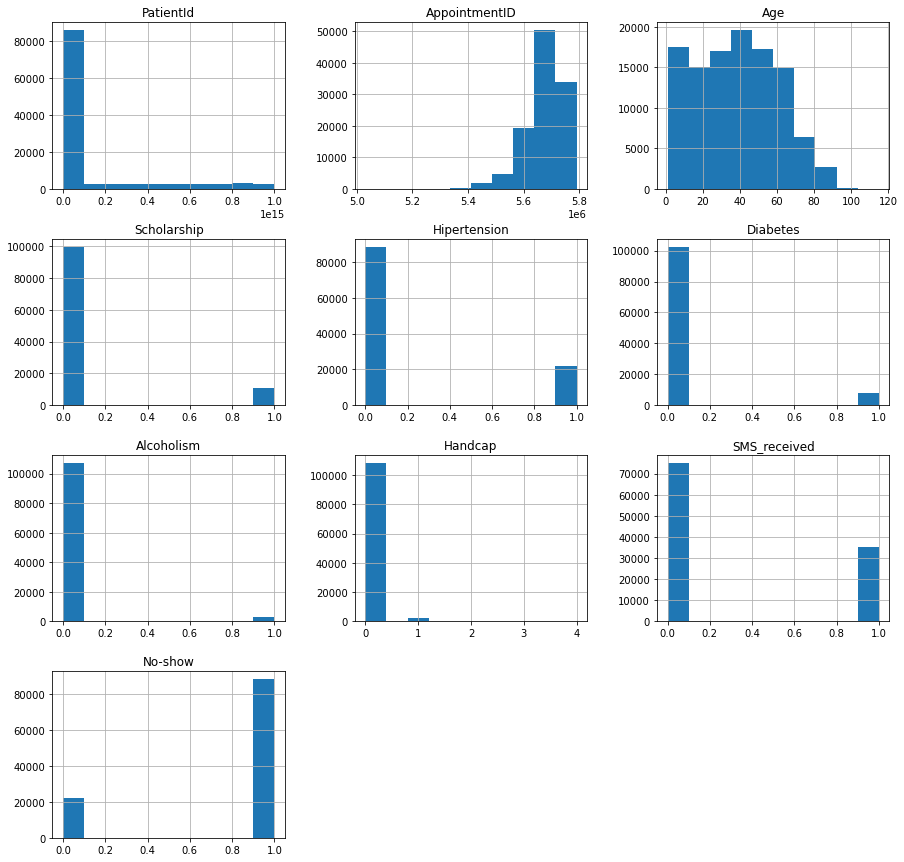

In [197]:
df.hist(figsize=(15,15));

From above histograms, 
1. it appears more than 20% of patients have hipertension
2. Apporx., 5% of patients do have Diabetes,
3. 10% of patients do have scholoarships while most do not have
4. Approximately 20% of patients are infants (where age is 0)


## Exploratory Data Analysis

### 1. Percentage of patients who turned up to appointment

In [198]:
#Creating mask

showed = df['No-show']==1
not_showed = df['No-show']==0
df['showed'] = showed
df['not_showed'] = not_showed


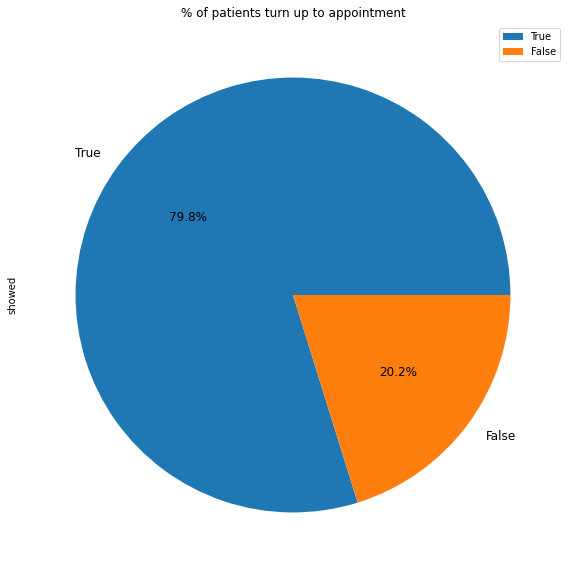

In [199]:
allshow = df['showed'].value_counts()
pieChart = allshow.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12)
pieChart.set_title ('% of patients turn up to appointment', fontsize=12)
plt.legend()

There is an overall show up rate of 79.8% to the appointment, while the no-show rate is 20.2%

### 2. Checking the relationshiop between Hipertension and Show

In [200]:
def show_rate_per_desease (x, y): # this function is to create bar diargrams between two variables of dataset
    print (df.groupby(x)[y].mean()*100)
    df.groupby(x)[y].mean().plot(figsize=(10,10), kind='bar', color=['orange', 'blue'])
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title( 'Relationship between {} and {}'.format(x, y))
    return

Hipertension
0    79.096083
1    82.698041
Name: showed, dtype: float64


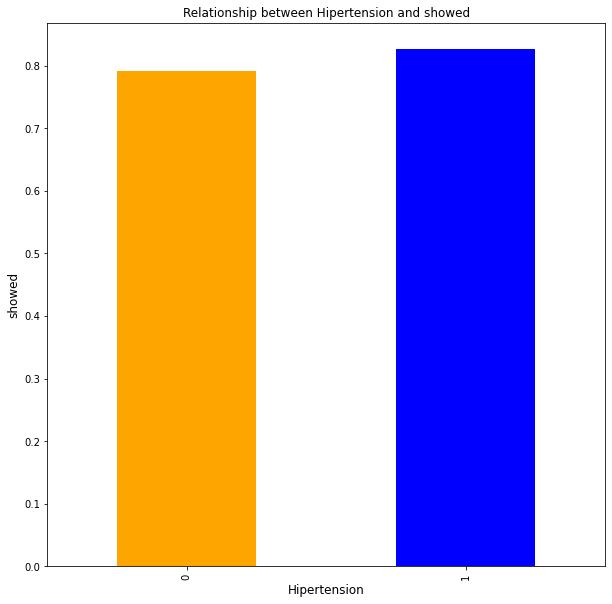

In [201]:
show_rate_per_desease('Hipertension', 'showed') # this gives the relationship between hipertension and patients who showed

The mean of hipertensed patients show up rate is slightly higher than who didn't

### 3. Relationship between Allcoholism and show rate

Alcoholism
0    79.805162
1    79.851190
Name: showed, dtype: float64


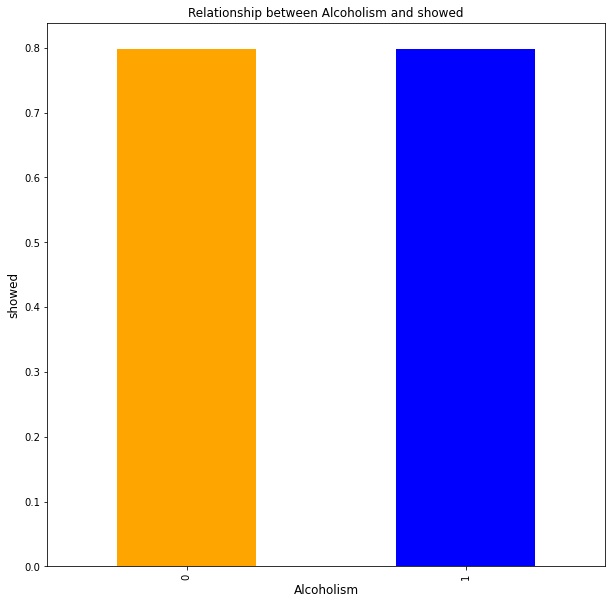

In [203]:
show_rate_per_desease('Alcoholism', 'showed') # this gives the relation between Alcoholism and patients who showed

the mean rates of alcoholic patients nearly the same

### 4. How Diabetic patients associated with no-show

In [204]:
df_no_show = df[df['No-show']==0] # a data set of patients who didn't turn up to appointment
df_show = df[df['No-show']==1] # a data set of patients who did turn up to appointment
print (df_no_show.shape)
print (df_show.shape)

(22319, 16)
(88207, 16)


Text(0, 0.5, 'Diabetic Patients')

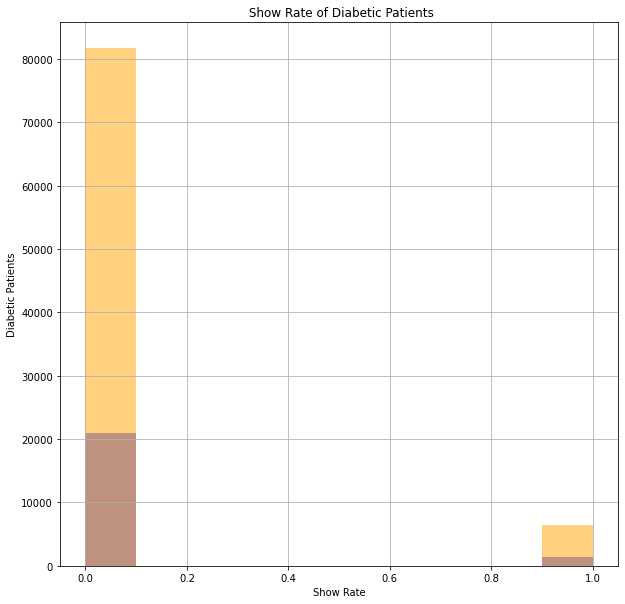

In [205]:
df_no_show['Diabetes'].hist(figsize = (8,8),alpha=0.5, color = 'blue')
df_show['Diabetes'].hist(figsize=(10,10), alpha=0.5, color = 'orange')
plt.title(' Show Rate of Diabetic Patients')
plt.xlabel('Show Rate')
plt.ylabel('Diabetic Patients')

In [206]:
diab_count = df[df['Diabetes']==1].shape[0]
print ('Total diabetic patients are', diab_count)

diab_show_count = df[(df['Diabetes']==1) & (df['No-show']==0)].shape[0]

print ('Total diabetic patients who turned up to appointment are', diab_show_count)
diab_noshow_count = df[(df['Diabetes']==1) & (df['No-show']==1)].shape[0]
print ('Total diabetic patients who didn\'t turn up are', diab_noshow_count )


diab_show_percent = diab_show_count/diab_count
diab_noshow_percent = diab_noshow_count/diab_count

print ("percentage of diabetics turned up is:", diab_show_percent*100)
print ("percentage of diabetics didn\'t turn up is :", diab_noshow_percent*100)

Total diabetic patients are 7943
Total diabetic patients who turned up to appointment are 1430
Total diabetic patients who didn't turn up are 6513
percentage of diabetics turned up is: 18.00327332242226
percentage of diabetics didn't turn up is : 81.99672667757774


From the above diagram and calculations:
1. it is imperative that 103K patients are non diabetic where as merely 6k to 7k patients are diabetic.
2. Also, the percentage of diabetic patients who turned up t appointment is much higher than who didn't
3. The percentage of diabetics who turned up to appointment is 81.99% against who didn't turn up is 18.00%

### 5. How Hipertension patients associated with No-show

Text(0, 0.5, 'Hipertension patients')

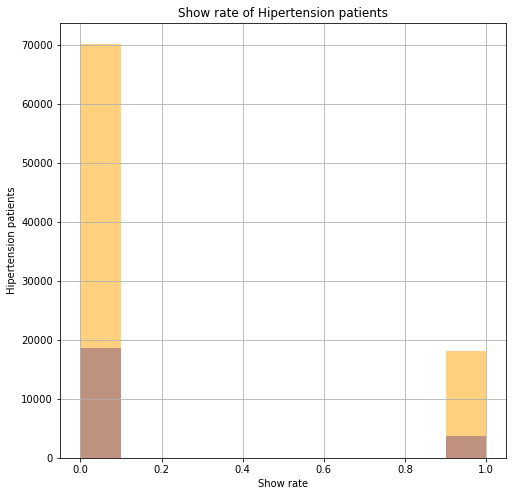

In [207]:
df_no_show['Hipertension'].hist(figsize=(8,8), alpha=0.5, color = 'blue')
df_show['Hipertension'].hist(alpha=0.5, color = 'orange')
plt.title('Show rate of Hipertension patients')
plt.xlabel('Show rate')
plt.ylabel('Hipertension patients')


In [208]:
hiper_count = df[df['Hipertension']==1].shape[0]
print ('Total Hipertension patients are', hiper_count)

hiper_show_count = df[(df['Hipertension']==1) & (df['No-show']=='No')].shape[0]

print ('Total hipertension patients who turned up to appointment are', hiper_show_count)
hiper_noshow_count = df[(df['Hipertension']==1) & (df['No-show']=='Yes')].shape[0]
print ('Total hipertension patients who didn\'t turn up are', hiper_noshow_count )


hiper_show_percent = hiper_show_count/hiper_count
hiper_noshow_percent = hiper_noshow_count/hiper_count

print ("percentage of hipertension turned up is:", hiper_show_percent*100)
print ("percentage of h47ipertension didn\'t turn up is :", hiper_noshow_percent*100)

Total Hipertension patients are 21801
Total hipertension patients who turned up to appointment are 0
Total hipertension patients who didn't turn up are 0
percentage of hipertension turned up is: 0.0
percentage of h47ipertension didn't turn up is : 0.0


From the above diagram and calculations: 
1. it is imperative that approximately 70K patients are non hipertensed where as merely 21K patients are hipertensed.
2. Also, the percentage of hipertensed patients who turned up to appointment is much higher than who didn't
3. The percentage of diabetics who turned up to appointment is 82.69% against who didn't turn up is 17.30%

### 6. mean age of patients who turned up and who don't

In [210]:
age_show = df_show['Age'].mean()
age_no_show = df_no_show['Age'].mean()
print (age_show)
print (age_no_show)

39.009894164822576
35.37954257941832


From above, it is imperative that greater the age, greater the show rate

## Conclusions
The summary of the patients show and no-show dataset is as follows:

1. There are 7,943 diabetic patients among them 6,513 patients did turn up to appointments while 1,430 didn't
2. The percentages of diabetics student show and no show  are 81.99% and 18.00 respectively
3. There are 21,801 hipertensed patients among them 18,029 patients did turn up to appointments while 3,772 didn't
4. The percentages of hipertensed patients show and no show  are 82.69% and 17.30 respectively
5. Mean age of patients turned up and who didn't turn up are 37.79 & 34.31. Apparently, higher the age higher the show


## Limitations:

1. There are 3000+ entries have 0 age. It would have a greater impact on the showrate if those original values are available
2. The analysis would have been more effective if we have patients income levels as well as severity of illness


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])